In [1]:
import os
import pandas as pd
from vidio import extract_frames, display, draw_tracks
import cv2 as cv
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "D:\\OneDrive\\Desktop\\All\\magnetlab\\20230718\\"
video_name = "22HzRMy1M270"

In [3]:
sample1 = extract_frames(path + video_name + ".avi")[44]
sample2 = extract_frames(path + video_name + ".avi")[44]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


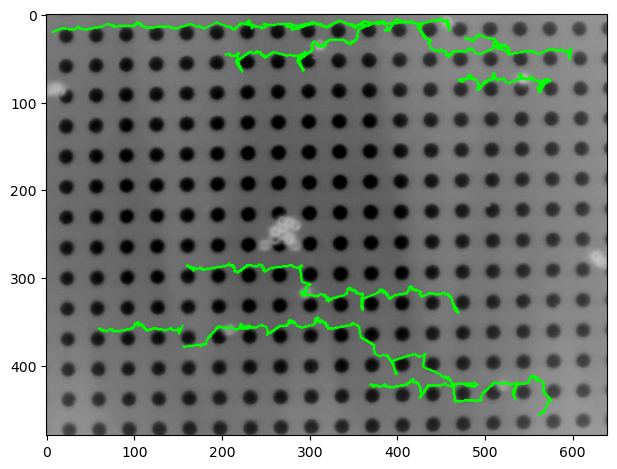

In [4]:
new_tracks_folder = path + "tracks\\" + video_name
new_tracks = []
for track_csv in os.listdir(new_tracks_folder):
    new_tracks.append(pd.read_csv(new_tracks_folder + "\\" + track_csv))
display(draw_tracks(new_tracks, sample1))

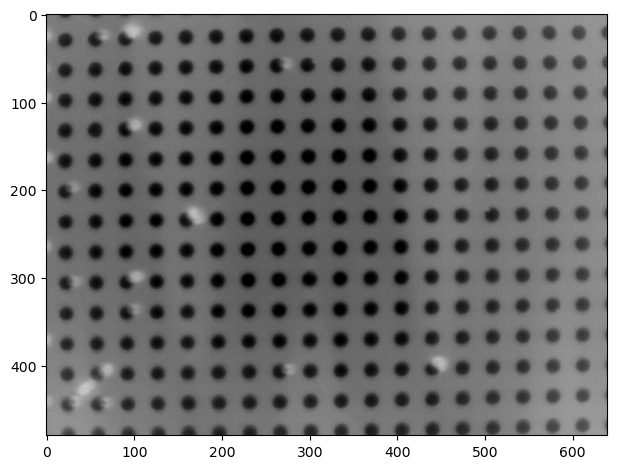

In [28]:
old_tracks_folder = path + "RawCSVFiles\\" + video_name
old_tracks = []
for track_csv in os.listdir(old_tracks_folder):
    old_tracks.append(pd.read_csv(old_tracks_folder + "\\" + track_csv))
display(draw_tracks(old_tracks, sample2))

In [29]:
video = np.array(extract_frames(path + video_name + ".avi"))
# video *= 255
# video = video.astype(np.uint8)
# for frame in video:
#     # frame *= 255
#     # frame = frame.astype(np.uint8)
    # for track in new_tracks:
    #     for i in range(len(track) - 1):
    #         cv.line(frame, (int(track['x'].iloc[i]), int(track['y'].iloc[i])), 
    #                 (int(track['x'].iloc[i+1]), int(track['y'].iloc[i+1])), (0, 255, 0), 2)
    
            


In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

fps = 56.95

fig = plt.figure()
im = plt.imshow(video[0])
for track in new_tracks:
    for i in range(len(track) - 1):
        plt.plot([track['x'].iloc[i], track['x'].iloc[i+1]], [track['y'].iloc[i], track['y'].iloc[i+1]], 'g')
plt.close()

def init():
    im.set_data(video[0])
    return [im]

def animate(i):
    im.set_array(video[i])
    return [im]

animation = animation.FuncAnimation(fig, animate, init_func=init, frames=len(video), interval=1000/fps, blit=True)
HTML(animation.to_html5_video())